In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import add, Dropout, Activation, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from sklearn.metrics import r2_score
from matplotlib.patches import Patch
from scipy import stats
import random as python_random
import warnings
warnings.filterwarnings(action='ignore')

In [26]:
seed_num = 5
np.random.seed(seed_num)
python_random.seed(seed_num)
tf.random.set_seed(seed_num)

In [27]:
#파일 불러오기
excel_data=pd.read_excel('데이터정리_취합_소.xlsx', sheet_name='ResultWeight_MainDimension', header=1)
excel_data[0:8]

,돼지,D1,rear_W,rear_trunk_W,rear_trunk_A,trunk_W,trunk_H,trunk_A,trunk_G,trunk_front_W,...,max1,mean2,max2,mean3,max3,mean4,max4,mean5,max5,weight
0,상관계수,0.224671,0.490432,0.53374,0.447982,0.844043,0.338332,0.818565,0.747194,0.492227,...,0.820094,0.323015,0.171445,0.562356,0.667816,0.754422,0.781111,0.579229,0.527422,1
1,2022_08_10_164935_760_123454.pcd,1000.010000,626.300000,644.43000,437945.650000,766.350000,881.540000,536281.670000,2618.780000,635.790000,...,782.320000,846.880000,902.330000,0.820000,0.880000,478192.010000,558005.950000,2502.030000,2676.490000,760
2,2022_08_10_164938_760_123454.pcd,1000.010000,613.800000,636.77000,423469.520000,810.680000,858.710000,546742.600000,2641.630000,686.550000,...,814.930000,829.600000,876.770000,0.870000,0.940000,492604.190000,567070.800000,2515.050000,2695.410000,760
3,2022_08_10_164943_760_123454.pcd,1110.010000,571.620000,627.15000,421899.660000,794.610000,843.230000,531064.360000,2600.220000,650.540000,...,802.610000,847.130000,1051.280000,0.820000,0.950000,473963.160000,554214.080000,2508.900000,2869.910000,760
4,2022_08_10_164946_760_123454.pcd,1150.010000,528.660000,565.01000,408052.190000,810.030000,855.260000,549242.080000,2634.540000,653.820000,...,821.240000,811.890000,867.840000,0.870000,0.970000,476599.320000,567133.620000,2476.310000,2680.670000,760
5,2022_08_10_165558_760_123454.pcd,990.010000,608.000000,668.06000,459952.620000,819.000000,852.650000,552299.220000,2655.300000,666.130000,...,833.080000,869.250000,1040.390000,0.830000,0.970000,498735.750000,571712.020000,2567.910000,2760.180000,760
6,2022_08_10_165601_760_123454.pcd,970.010000,622.540000,675.94000,461765.700000,808.440000,853.450000,549666.940000,2649.290000,663.430000,...,813.320000,837.790000,864.830000,0.870000,0.950000,499497.470000,567715.080000,2537.740000,2691.140000,760
7,2022_08_10_165754_700_123456.pcd,890.010000,650.820000,680.61000,483585.780000,801.050000,865.560000,545320.390000,2631.000000,642.490000,...,808.100000,857.220000,886.760000,0.860000,0.940000,517789.490000,567286.700000,2579.130000,2676.750000,700


In [28]:
#무게와 치수와 가지는 상관관계 확인
data=excel_data[1:]
corr=excel_data[0:1]
corr_np = corr.to_numpy()[0,1:]
corr_np

array([0.22467066684498044, 0.49043160486681836, 0.5337395478666228,
       0.4479824349411473, 0.8440427490261646, 0.33833154768258644,
       0.8185646809663129, 0.7471943886625361, 0.49222686606212385,
       0.3943120568471855, 0.5664471873789749, 0.4030153053962658,
       0.5494164983233297, 0.8488872250938814, 0.8200940052406936,
       0.32301524055268166, 0.17144483486646608, 0.5623564804341546,
       0.6678164729291294, 0.7544217044885758, 0.7811111876422259,
       0.5792286870526702, 0.5274215697729255, 1], dtype=object)

In [29]:
X = data.to_numpy()[:,1:-1]
y = data.to_numpy()[:,-1]
corr_np.shape

(24,)

In [30]:
X_index = []
for i in range(corr_np.shape[0]-1):
    if(corr_np[i]>0.0):
        X_index.append(i)
sel_X = X[:,X_index[1:]]
y=np.reshape(y,(-1, 1))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(sel_X,y, test_size=0.20, random_state=1)

In [32]:
X_train.shape

(249, 22)

In [33]:
#MinMaxScaler 사용하여 데이터 정규화, scaler1은 X, scaler2는 Y 정규화에 쓰일 예정
scaler1= MinMaxScaler()
scaler1.fit(sel_X)

scaler2= MinMaxScaler()
scaler2.fit(y)

MinMaxScaler()

In [34]:
X_scaled = scaler1.transform(X_train)
y_scaled = scaler2.transform(y_train)
X_test_scaled = scaler1.transform(X_test)
y_test_scaled = scaler2.transform(y_test)
shuff = np.arange(X_scaled.shape[0])
np.random.shuffle(shuff)
shuff

array([ 93, 153, 199,  88, 185,  98, 163, 134,  75, 168,  48, 117, 192,
        89,  61, 193, 145, 148, 232,  84, 114,   6, 161,  90, 138, 198,
        42, 101, 176, 151,   3, 184,  53, 246, 167,  55, 201,  60,  56,
       107,  28, 209, 127,  17,  37,  25,  21,  26,  46,  83,  97, 207,
       215,  40, 235,  51, 211, 183,  49, 210, 182, 104, 248,  79, 156,
        95, 220,  34, 191, 213,  96, 217, 195,  39, 221, 227, 130, 188,
       241,  77, 186,  24,  54, 202,  50,  23,   1,  87,  45, 222, 244,
       196, 238,  43,  62, 139, 166, 119, 122, 102, 218,  74, 136,  59,
       123,  12,  71, 187, 149, 150,  19,  57,  66, 171, 216,  63, 169,
       140, 223,  15, 160,  10, 159, 214, 219,  36, 115, 154,   4,  92,
       116, 224,  22,  81,  52,  13,  72,  20, 111,  35,  70, 120,  29,
       180,  69, 177, 178, 126, 225, 240,  64, 173, 174, 128,  82, 172,
       142, 165,  76,  32, 170, 243, 141, 152, 162, 133, 233,  47, 194,
         9, 197,  14,  94,  16, 245,  85,  33, 157, 236,  78,  9

In [35]:
#모델 설계하기
#4개의 은닉층으로 구성된 Multi-layer-perceptron 모델
#입력층과 은닉층의 노드 갯수는 34개이며, 출력층의 노드는 1개
model = models.Sequential()
model.add(tf.keras.layers.Dense(X_scaled.shape[1], input_dim =X_scaled.shape[1],activation = 'relu'))
model.add(tf.keras.layers.Dense(X_scaled.shape[1],activation = 'relu'))
model.add(tf.keras.layers.Dense(X_scaled.shape[1]/2,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))
optimize = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimize)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 22)                506       
                                                                 
 dense_5 (Dense)             (None, 22)                506       
                                                                 
 dense_6 (Dense)             (None, 11)                253       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 1,277
Trainable params: 1,277
Non-trainable params: 0
_________________________________________________________________


In [36]:
#모델 실행
history = model.fit(X_scaled[shuff], y_scaled[shuff], epochs=300)


Epoch 1/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0706
Epoch 2/300
8/8 [==============================] - 0s 997us/step - loss: 0.0486
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 4/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 5/300
8/8 [==============================] - 0s 997us/step - loss: 0.0257
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 7/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 8/300
8/8 [==============================] - 0s 997us/step - loss: 0.0208
Epoch 9/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 10/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 11/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 12/300
8/8 [==============================] - 0s 997us/step - loss: 0.0215
Epoch 13/300
8/8 [==============================] - 0

8/8 [==============================] - 0s 997us/step - loss: 0.0102
Epoch 104/300
8/8 [==============================] - 0s 997us/step - loss: 0.0097
Epoch 105/300
8/8 [==============================] - 0s 997us/step - loss: 0.0099
Epoch 106/300
8/8 [==============================] - 0s 997us/step - loss: 0.0103
Epoch 107/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 108/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 109/300
8/8 [==============================] - 0s 997us/step - loss: 0.0101
Epoch 110/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 111/300
8/8 [==============================] - 0s 997us/step - loss: 0.0159
Epoch 112/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 113/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 114/300
8/8 [==============================] - 0s 997us/step - loss: 0.0132
Epoch 115/300
8/8 [=====================

8/8 [==============================] - 0s 997us/step - loss: 0.0055
Epoch 205/300
8/8 [==============================] - 0s 997us/step - loss: 0.0054
Epoch 206/300
8/8 [==============================] - 0s 997us/step - loss: 0.0054
Epoch 207/300
8/8 [==============================] - 0s 997us/step - loss: 0.0055
Epoch 208/300
8/8 [==============================] - 0s 997us/step - loss: 0.0052
Epoch 209/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 210/300
8/8 [==============================] - 0s 997us/step - loss: 0.0053
Epoch 211/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 212/300
8/8 [==============================] - 0s 997us/step - loss: 0.0048
Epoch 213/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 214/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 215/300
8/8 [==============================] - 0s 997us/step - loss: 0.0053
Epoch 216/300
8/8 [===================

<AxesSubplot:>

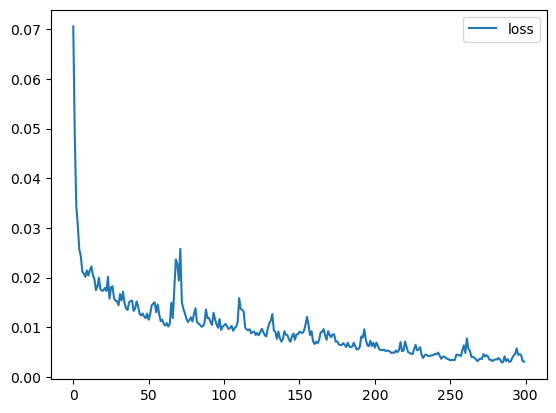

In [37]:
train_results =  pd.DataFrame(history.history)
train_results[['loss']].plot()


In [38]:
X_pre_scaled = model.predict(X_scaled)
X_test_pred_scaled = model.predict(X_test_scaled)

2/2 [==============================] - 0s 2ms/step


In [39]:
#train error
y_train_pred = scaler2.inverse_transform(X_pre_scaled)
y_train
train_error_rate=np.mean(abs(y_train_pred-y_train)*100/y_train)
train_error_rate

1.0805124103243993

In [40]:
#test error
y_test_pred = scaler2.inverse_transform(X_test_pred_scaled)
y_test
train_error_rate=np.mean(abs(y_test_pred-y_test)*100/y_test)
train_error_rate

1.901793160916618

In [41]:
R2=r2_score(y_test, y_test_pred)
R2

0.8522297255297375

In [42]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_test_pred)**0.5
RMSE

20.687015694417237

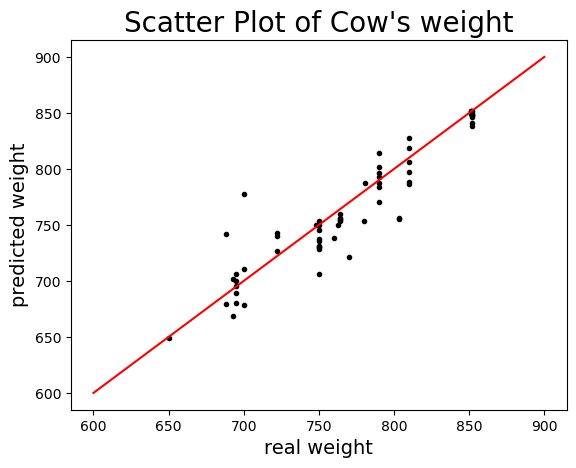

In [43]:
xx = np.linspace(600,900)
yy = np.linspace(600,900)
plt.plot(y_test, y_test_pred, linestyle='none', marker='o', markersize=3, color='black')
plt.title("Scatter Plot of Cow's weight", fontsize=20)
plt.xlabel('real weight', fontsize=14)
plt.ylabel('predicted weight', fontsize=14)
plt.plot(xx, yy, color='red')
plt.show()

In [45]:
#total error
X_pred = model.predict(scaler1.transform(sel_X))
y_pred = scaler2.inverse_transform(X_pred)
y
train_error_rate=np.mean(abs(y_pred-y)*100/y)
train_error_rate

10/10 [==============================] - 0s 776us/step


1.2463479996637645

In [68]:
y_train_df = pd.DataFrame(y_train, columns = ['실제무게'])
y_train_pred_df= pd.DataFrame(y_train_pred,columns = ['예측무게'])
result_train = pd.concat([y_train_df,y_train_pred_df],axis=1)

In [69]:
y_test_df = pd.DataFrame(y_test, columns = ['실제무게'])
y_test_pred_df= pd.DataFrame(y_test_pred,columns = ['예측무게'])
result_test = pd.concat([y_test_df,y_test_pred_df],axis=1)

In [70]:
y_df = pd.DataFrame(y, columns = ['실제무게'])
y_pred_df= pd.DataFrame(y_pred,columns = ['예측무게'])
result_total = pd.concat([y_df,y_pred_df],axis=1)

In [73]:
result_total.to_excel("Total.xlsx")
result_train.to_excel("Train.xlsx")
result_test.to_excel("Test.xlsx")

In [77]:
R_all=r2_score(y_train, y_train_pred)
R_all

0.9589360416165155

In [75]:
y_test.shape

(63, 1)